<a href="https://colab.research.google.com/github/UPstartDeveloper/DS-2.4-Advanced-Topics/blob/main/Notebooks/Computer_Vision/convolution_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
import tensorflow as tf
import numpy as np
from typing import List
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
%matplotlib inline

## Convolution Function

In [2]:
def my_conv(image: np.array, filter: np.array, stride=1):
  """Performs a convolution on an input image

  Assumptions:
    1. image is square and the size is an odd number
    2. filter is square and the size is an odd number.
    3. the filter is smaller than the image size
    3. no zero padding

  Args:
    Image: 3D array - an RBG image
    filter: 2D array representing the parameters to use
    stride: int - using the same stride length for both directions

  Returns: - a new RGB image
  """
  # init the output
  feature_map = list()
  FILTER_HEIGHT, FILTER_WIDTH = len(filter), len(filter[0])
  # iterate over each channels
  for channel_index in range(image.shape[-1]):
    # get the image on just one channel
    channel = image[:, :, channel_index]
    # init a new matrix for this channel
    conv_channel = list()
    # iterate over the rows and columns
    starting_row_ndx = 0
    while starting_row_ndx < len(image) - FILTER_HEIGHT:
      # get the starting column
      starting_col_ndx = 0
      conv_channel_row = list()
      while starting_col_ndx < len(image) - FILTER_WIDTH:
        # get the block of pixels needed for the convolution
        pixels = [
          channel[row_ndx][starting_col_ndx:starting_col_ndx + FILTER_WIDTH]
          for row_ndx in range(
              starting_row_ndx, starting_row_ndx + FILTER_HEIGHT
            )
        ]
        # compute the convolution
        convolution = np.sum(np.multiply(pixels, filter))
        # add it to the output
        conv_channel_row.append(convolution)
        # move on to the next starting column
        starting_col_ndx += stride
      # add the next row to the channel being convoluted
      conv_channel.append(conv_channel_row)
      conv_channel_row = list()
      # move to the next starting row for the convolutions
      starting_row_ndx += stride
    # add this channel to the overall image being convoluted
    feature_map.append(conv_channel)
  # align the channels properly into an RBG image
  feature_map = np.dstack(feature_map)
  return feature_map

## Testing the Function

### Getting the Image

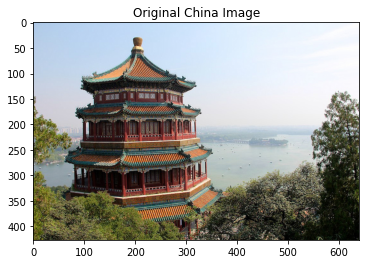

In [13]:
china = load_sample_image("china.jpg") / 255
plt.imshow(china)
plt.title("Original China Image")
plt.show()

### Testing Different Filters

Filter values and descriptions based on Victor Powell's explanations on [Setosa.io](https://setosa.io/ev/image-kernels/).

#### blur 

Powell tells us that the blur kernel makes adjacent pixel values less distinct from each other. As you can see in the matrix below, we constrain all the pixels to small values, all within a tight range between 0.0625-0.25.



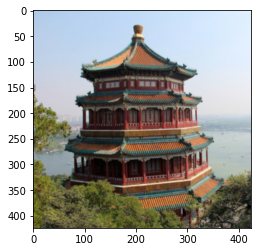

In [4]:
filter = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125, .25, 0.125],
    [0.0625, 0.125, 0.0625]
])
conv_image = my_conv(china, filter)
plt.imshow(conv_image)
plt.show()

#### bottom sobel

Powell tells us that this kernel shows the difference in adjacent pixel values moving downwards. As you can see in the filter matrix below, we over emphasize pixels below and do the opposite for those above.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


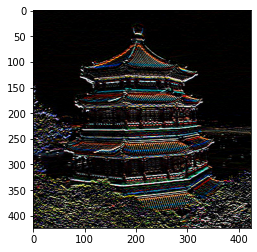

In [5]:
filter = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])
conv_image = my_conv(china, filter)
plt.imshow(conv_image)
plt.show()

#### emboss

Powell informs us that this kernel gives the illusion of depth by emphasizing the differences of pixels in a given direction. In this case, in a direction along a line from the top left to the bottom right.

As you can see, we implement this in the filter below by using values that are the multiplicative inverses of each other, on opposite sides of the diagonal (going from bottom left to top right).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


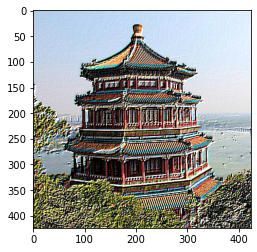

In [6]:
filter = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])
conv_image = my_conv(china, filter)
plt.imshow(conv_image)

#### identity 

This matrix only takes in the pixel value at the corresponding location in the input image into consideration. So it's exactly the same pixel value in the output!

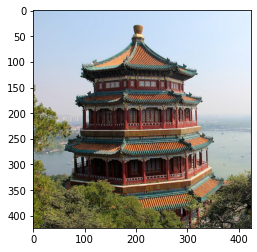

In [12]:
filter = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])
conv_image = my_conv(china, filter)
plt.imshow(conv_image)
plt.show()

#### left sobel

This is much like the bottom sobel filter above. Notice that now we have moved the positive values in the matrix to the left hand column, and therefore the left side of the convoluted image is emphasized.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


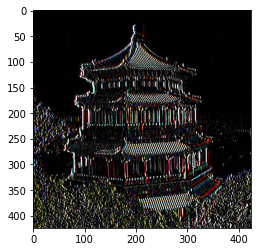

In [7]:
filter = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
conv_image = my_conv(china, filter)
plt.imshow(conv_image)
plt.show()

#### outline

Powell describes that the  outline kernel is used to highlight large differences in pixel values. 

Notice how in the matrix below, all pixels are given the same value, except for the one in the middle (which differs both in magnitude and sign).

Therefore, a pixel next to neighbor pixels with close to the same intensity will appear black in the new image. This is because if you took the element-wise product of this matrix with any matrix of the same dimensions, which had only the value x in it, it would come out as 0.


Conversely, a pixel next to neighbor pixels that differ strongly will appear white.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


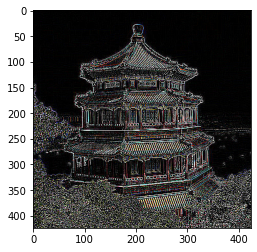

In [8]:
filter = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
conv_image = my_conv(china, filter)
plt.imshow(conv_image)
plt.show()

#### right sobel

This kernel is basically the left sobel filter, that has been mirrored vertically.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


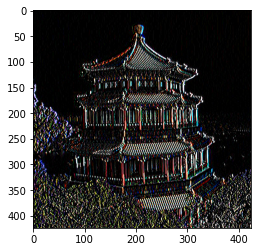

In [9]:
filter = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
conv_image = my_conv(china, filter)
plt.imshow(conv_image)
plt.show()

#### sharpen

Powell describes that this kernel exaggerates the differences in adjacent pixel values.

We do this in code by making the center value differ a lot from it's top, bottom, left, and right neighbors in both size and sign. We also make the corners 0, so there's less overlaps in the feature map.

Notice how the output image below looks more vivid than before.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


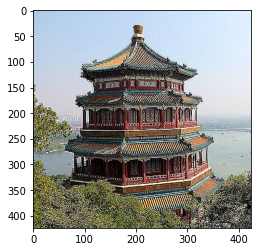

In [10]:
filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
conv_image = my_conv(china, filter)
plt.imshow(conv_image)
plt.show()

#### top sobel

This kernel lets us do the opposite of the bottom sobel - now the pixels along the top of the image are emphasized.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


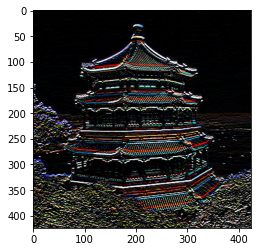

In [11]:
filter = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])
conv_image = my_conv(china, filter)
plt.imshow(conv_image)
plt.show()